In [1]:
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
plt.rcParams['figure.figsize'] = [10,8]

In [3]:
# Number of cores to use to perform parallel fitting of the forest model
n_jobs = 1

In [4]:
# Load the faces dataset
data = fetch_olivetti_faces()

In [5]:
X, y = data.data, data.target

In [6]:
mask = y < 5  # Limit to 5 classes
X = X[mask]
y = y[mask]

In [7]:
# Build a forest and compute the pixel importances
print("Fitting ExtraTreesClassifier on faces data with %d cores..." % n_jobs)
t0 = time()
forest = ExtraTreesClassifier(n_estimators=1000,
                              max_features=128,
                              n_jobs=n_jobs,
                              random_state=0)

forest.fit(X, y)
print("done in %0.3fs" % (time() - t0))
importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)

Fitting ExtraTreesClassifier on faces data with 1 cores...
done in 0.989s


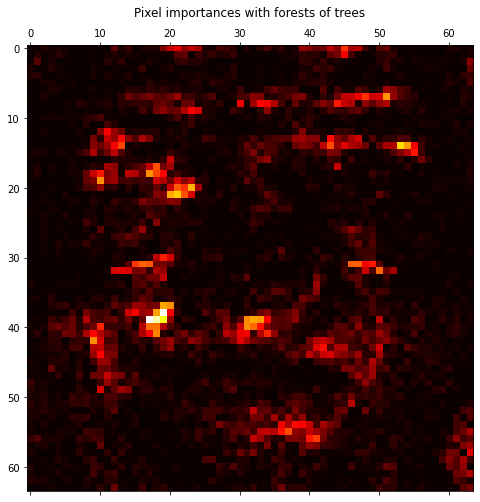

In [8]:
# Plot pixel importances
plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances with forests of trees")
plt.show()